In [28]:
import torch
import torch.nn as  nn

In [29]:
transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12,d_model = 256,batch_first = True)
src = torch.rand((32,10,256))
tgt = torch.rand((32,20,256))
out = transformer_model(src, tgt)

In [30]:
print(out.shape)
from cuboid.network import Network_Whole

import json

root = "/Users/melkor/Documents/GitHub/ProGRIP/cuboid/PretrainModels/table"
with open(root+ '/hypara.json') as f:
    hypara = json.load(f) 

device = "cuda:0" if torch.cuda.is_available() else "cpu"

net = Network_Whole(hypara)
net.load_state_dict(torch.load(root + "/table.pth",map_location = device))

pc = torch.randn([2,300,3])

outputs = net(pc)

scale = outputs["scale"]
rot = outputs["rotate"]
shift = outputs["trans"]
exist = outputs["exist"]

print("box scale:",scale.shape)
print("box rot:",rot.shape)
print("box shift:",shift.shape)
print("box exist:",exist.shape)

from utils import *

b = 1
k = 1
box = decode_3d_box(scale[b][k],rot[b][k],shift[b][k])




torch.Size([32, 20, 256])
box scale: torch.Size([2, 14, 3])
box rot: torch.Size([2, 14, 3, 3])
box shift: torch.Size([2, 14, 3])
box exist: torch.Size([2, 14, 1])


In [31]:

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure()
ax = Axes3D(fig)

x = [0,1,1,0],[0,1,1,0]
y = [0,0,1,1],[0,0,1,1]
z = [0,0,0,0],[1,1,1,1]

surfaces = []

for i in range(len(x)):
    surfaces.append( [list(zip(x[i],y[i],z[i]))] )

for surface in surfaces:
    ax.add_collection3d(Poly3DCollection(surface))

plt.show()

<Figure size 640x480 with 0 Axes>

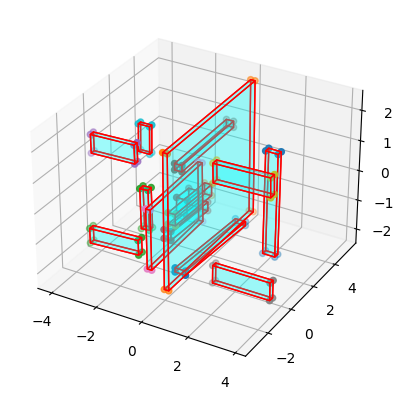

In [36]:


from datasets import *
from config import *
cat = "table"
dataset = dataset = shapenet4096("train",cat,False)


root = "/Users/melkor/Documents/GitHub/ProGRIP/cuboid/PretrainModels/{}".format(cat)
with open(root+ '/hypara.json') as f:
    hypara = json.load(f) 
net = Network_Whole(hypara)
net.load_state_dict(torch.load(root + "/{}.pth".format(cat),map_location = device))

pc = dataset[0]["point_cloud"].unsqueeze(0)

outputs = net(pc)

scale = outputs["scale"]
rot = outputs["rotate"]
shift = outputs["trans"]
exist = outputs["exist"]

# point cloud cuboid summary created
b = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
for k in range(14):
    boxx = decode_3d_box(scale[b][k],rot[b][k],shift[b][k])
    points = np.array(boxx.detach())
    Z = points * 10
    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
    verts = [[Z[0],Z[1],Z[2],Z[3]],
    [Z[4],Z[5],Z[6],Z[7]],
    [Z[0],Z[1],Z[5],Z[4]],
    [Z[2],Z[3],Z[7],Z[6]],
    [Z[1],Z[2],Z[6],Z[5]],
    [Z[4],Z[7],Z[3],Z[0]]]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.20))

plt.show()